# 第一部 構造化データ

## 第一章 システムデータの加工・可視化を行う20本ノック

### ノック1 : 法人情報データを読み込んでみよう

In [647]:
import pandas as pd

shizuoka_data = pd.read_csv("../data/22_shizuoka_all_20210331.csv", encoding="shift-jis", header=None, dtype=object)
shizuoka_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0


#### 読み込んだデータの件数

In [648]:
len(shizuoka_data)

114613

### ノック2 : 読み込んだデータを確認しよう

#### 列 項目名の確認

In [649]:
shizuoka_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')

#### 列 項目数の確認

In [650]:
len(shizuoka_data.columns)

30

#### 各列のデータ型の確認

In [651]:
shizuoka_data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
dtype: object

### ノック3 : ヘッダ用のテキストファイルを読み込もう

In [652]:
mst = pd.read_csv("../data/mst_column_name.txt", encoding="shift-jis", sep='\t')
mst.head()

,column_id,column_name_ja,column_name_en
0,1,一連番号,sequenceNumber
1,2,法人番号,corporateNumber
2,3,処理区分,process
3,4,訂正区分,correct
4,5,更新年月日,updateDate


In [653]:
len(mst)

30

In [654]:
len(mst) == len(shizuoka_data.columns)

True

### ノック4 : ヘッダ行を追加しよう

In [655]:
columns = mst.column_name_en.values
print(columns)

['sequenceNumber' 'corporateNumber' 'process' 'correct' 'updateDate'
 'changeDate' 'name' 'nameImageId' 'kind' 'prefectureName' 'cityName'
 'streetNumber' 'addressImageId' 'prefectureCode' 'cityCode' 'postCode'
 'addressOutside' 'addressOutsideImageId' 'closeDate' 'closeCause'
 'successorCorporateNumber' 'changeCause' 'assignmentDate' 'latest'
 'enName' 'enPrefectureName' 'enCityName' 'enAddressOutside' 'furigana'
 'hihyoji']


#### ヘッダーの設定

In [656]:
shizuoka_data.columns = columns
shizuoka_data.columns

Index(['sequenceNumber', 'corporateNumber', 'process', 'correct', 'updateDate',
       'changeDate', 'name', 'nameImageId', 'kind', 'prefectureName',
       'cityName', 'streetNumber', 'addressImageId', 'prefectureCode',
       'cityCode', 'postCode', 'addressOutside', 'addressOutsideImageId',
       'closeDate', 'closeCause', 'successorCorporateNumber', 'changeCause',
       'assignmentDate', 'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji'],
      dtype='object')

In [657]:
shizuoka_data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0


## ノック5 : 統計量や欠損値を確認しよう

#### 統計量の算出

In [658]:
shizuoka_data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114613,114613,114613,114613,114613,114613,114613,1243,114613,114613,...,666,1111,114613,114613,232,230,230,0,46620,114613
unique,114613,114613,6,2,1316,1344,105857,1243,9,1,...,572,1051,1328,1,231,1,129,0,41339,2
top,1,1000013040008,01,0,2015-11-13,2015-10-05,八幡神社,00067214,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"2-1-1,oohara, Ito shi",NaN,ハチマングウ,0
freq,1,1,94126,80704,55969,83291,171,1,51229,114613,...,12,12,101316,114613,2,230,10,NaN,30,114388


#### 欠損値の確認

In [659]:
shizuoka_data.isna()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114608,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114609,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114610,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114611,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False


#### 欠損値の集計

In [660]:
shizuoka_data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113370
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113418
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114613
addressOutsideImageId       114613
closeDate                   104536
closeCause                  104536
successorCorporateNumber    113947
changeCause                 113502
assignmentDate                   0
latest                           0
enName                      114381
enPrefectureName            114383
enCityName                  114383
enAddressOutside            114613
furigana            

## ノック6 : 繰り返し処理で新しいデータを追加する

#### データフォルダの確認

In [661]:
import os
os.listdir('../data')

['mst_corp_kind.csv',
 'mst_hihyoji.csv',
 '22_shizuoka_all_20210331.csv',
 'diff_20210405.csv',
 'diff_20210407.csv',
 'diff_20210406.csv',
 'output',
 'diff_20210401.csv',
 'mst_process_kbn.csv',
 'mst_column_name.txt',
 'mst_latest.csv',
 'mst_closeCause.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_correct_kbn.csv',
 '.ipynb_checkpoints']

#### 指定したファイルの存在確認

In [662]:
from glob import glob

diff_files = glob('../data/diff_*.csv')
diff_files

['../data/diff_20210405.csv',
 '../data/diff_20210407.csv',
 '../data/diff_20210406.csv',
 '../data/diff_20210401.csv',
 '../data/diff_20210408.csv',
 '../data/diff_20210409.csv']

In [663]:
diff_files.sort()
diff_files

['../data/diff_20210401.csv',
 '../data/diff_20210405.csv',
 '../data/diff_20210406.csv',
 '../data/diff_20210407.csv',
 '../data/diff_20210408.csv',
 '../data/diff_20210409.csv']

#### 1つ目のファイルの読み込み

In [664]:
diff = pd.read_csv(diff_files[0], encoding='shift-jis', header=None, dtype=object)

print( len(diff) )
print( diff.head(3) )

2316
  0              1   2  3           4           5                   6    7   \
0  1  1010001016019  71  0  2021-04-01  2021-03-01         株式会社国際漢方研究所  NaN   
1  2  1010001092869  01  1  2021-04-01  2020-06-11  あさひ銀リテールファイナンス株式会社  NaN   
2  3  1010001092869  21  0  2021-04-01  2021-03-22  あさひ銀リテールファイナンス株式会社  NaN   

    8    9   ...   20                                                 21  \
0  301  東京都  ...  NaN  令和３年３月１日東京都渋谷区千駄ヶ谷五丁目２９番１１号ナカニシビル６０２号室株式会社Ｉｎｔｅ...   
1  301  東京都  ...  NaN                                                NaN   
2  301  東京都  ...  NaN                                                NaN   

           22 23   24   25   26   27               28 29  
0  2015-10-05  1  NaN  NaN  NaN  NaN  コクサイカンポウケンキュウショ  0  
1  2020-06-11  0  NaN  NaN  NaN  NaN  アサヒギンリテールファイナンス  0  
2  2020-06-11  1  NaN  NaN  NaN  NaN  アサヒギンリテールファイナンス  0  

[3 rows x 30 columns]


#### 「静岡」に絞り込み後のデータ

In [665]:
diff.columns = columns
diff = diff.loc[diff['prefectureName'] == '静岡県']
diff.head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
107,108,1080001015906,01,1,2021-04-01,2015-10-05,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,エムケイテック,0
108,109,1080001015906,12,1,2021-04-01,2021-03-30,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,エムケイテック,0
109,110,1080002015434,01,1,2021-04-01,2015-10-05,有限会社ハイナンＤＣ,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,ハイナンディーシー,0


In [666]:
shizuoka_data_test = shizuoka_data

print( len(shizuoka_data_test) )
print( len(shizuoka_data_test) == len(shizuoka_data) )

print( len(diff) )

data_test = pd.concat([shizuoka_data_test, diff], axis=0 )

print( len(data_test) )

data_test.tail(3)

114613
True
43
114656


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
2159,2160,9080401024929,01,0,2021-04-01,2021-04-01,株式会社リガーレ,NaN,301,静岡県,...,NaN,NaN,2021-04-01,1,NaN,NaN,NaN,NaN,リガーレ,0
2160,2161,9080402007726,01,1,2021-04-01,2015-10-05,有限会社丸信商店,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,マルシンショウテン,0
2161,2162,9080402021917,21,0,2021-04-01,2021-03-30,有限会社岡本商会,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,オカモトショウカイ,0


#### 差分データ読み込み結果

In [667]:
for f in diff_files:
    diff = pd.read_csv(f, encoding='shift-jis', header=None, dtype=object)
    diff.columns = columns  
    diff = diff.loc[ diff['prefectureName'] == '静岡県' ]
    shizuoka_data = pd.concat([shizuoka_data, diff])
shizuoka_data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,NaN,2017-07-07,1,NaN,NaN,NaN,NaN,アクト,0
3195,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,NaN,NaN,2021-04-09,1,NaN,NaN,NaN,NaN,レスカ,0
3196,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0
3197,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,8080401016019,令和３年４月１日静岡県磐田市安久路二丁目２番地の２まごころ株式会社（808040101601...,2015-10-05,1,NaN,NaN,NaN,NaN,コウボウ,0


#### 統計量

In [668]:
shizuoka_data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,115020,115020,115020,115020,115020,115020,115020,1246,115020,115020,...,678,1130,115020,115020,233,231,231,0,47018,115020
unique,114613,114758,6,2,1322,1351,106019,1245,9,1,...,581,1067,1334,2,232,1,130,0,41577,2
top,3032,7080402010509,01,0,2015-11-13,2015-10-05,八幡神社,00067824,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"2-1-1,oohara, Ito shi",NaN,ハチマングウ,0
freq,4,5,94398,80949,55969,83411,171,2,51474,115020,...,12,12,101546,114985,2,231,10,NaN,30,114795


#### 重複データ抽出

In [669]:
shizuoka_data[shizuoka_data['corporateNumber'].duplicated()]

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
107,108,1080001015906,01,1,2021-04-01,2015-10-05,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,エムケイテック,0
108,109,1080001015906,12,1,2021-04-01,2021-03-30,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,エムケイテック,0
109,110,1080002015434,01,1,2021-04-01,2015-10-05,有限会社ハイナンＤＣ,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,ハイナンディーシー,0
110,111,1080105005588,12,0,2021-04-01,2021-03-25,認定特定非営利活動法人ＲＥＡＬＥ ＷＯＲＬＤ,NaN,399,静岡県,...,NaN,NaN,2015-12-11,1,NaN,NaN,NaN,NaN,レアーレワールド,0
113,114,1080403003401,21,0,2021-04-01,2021-03-02,合同会社ポップスターインポート,NaN,305,静岡県,...,2080401020653,令和３年３月２日浜松市中区元浜町３２番地の１株式会社ポップスタージャパン（208040102...,2017-02-17,1,NaN,NaN,NaN,NaN,ポップスターインポート,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,3194,9080001004208,01,1,2021-04-09,2015-10-05,株式会社葉桐,NaN,301,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,ハギリ,0
3194,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,NaN,2017-07-07,1,NaN,NaN,NaN,NaN,アクト,0
3196,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0
3197,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,8080401016019,令和３年４月１日静岡県磐田市安久路二丁目２番地の２まごころ株式会社（808040101601...,2015-10-05,1,NaN,NaN,NaN,NaN,コウボウ,0


#### 重複データの削除

In [670]:
shizuoka_data.drop_duplicates(subset='corporateNumber', keep='last', inplace=True)

In [671]:
shizuoka_data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,NaN,2017-07-07,1,NaN,NaN,NaN,NaN,アクト,0
3195,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,NaN,NaN,2021-04-09,1,NaN,NaN,NaN,NaN,レスカ,0
3196,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0
3197,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,8080401016019,令和３年４月１日静岡県磐田市安久路二丁目２番地の２まごころ株式会社（808040101601...,2015-10-05,1,NaN,NaN,NaN,NaN,コウボウ,0


#### 統計量

In [672]:
shizuoka_data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114758,114758,114758,114758,114758,114758,114758,1245,114758,114758,...,678,1129,114758,114758,233,231,231,0,46900,114758
unique,114388,114758,6,2,1322,1351,105992,1245,9,1,...,581,1066,1334,2,232,1,130,0,41559,2
top,3032,1000013040008,01,0,2015-11-13,2015-10-05,八幡神社,00067214,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"2-1-1,oohara, Ito shi",NaN,ハチマングウ,0
freq,4,1,94176,80781,55849,83217,171,1,51331,114758,...,12,12,101319,114757,2,231,10,NaN,30,114533


#### 欠損値の集計

In [673]:
shizuoka_data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113513
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113563
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114758
addressOutsideImageId       114758
closeDate                   104650
closeCause                  104650
successorCorporateNumber    114080
changeCause                 113629
assignmentDate                   0
latest                           0
enName                      114525
enPrefectureName            114527
enCityName                  114527
enAddressOutside            114758
furigana            

## ノック7 : マスタを読み込んで項目を横につなげよう

#### フォルダ情報

In [674]:
import os

os.listdir('../data')

['mst_corp_kind.csv',
 'mst_hihyoji.csv',
 '22_shizuoka_all_20210331.csv',
 'diff_20210405.csv',
 'diff_20210407.csv',
 'diff_20210406.csv',
 'output',
 'diff_20210401.csv',
 'mst_process_kbn.csv',
 'mst_column_name.txt',
 'mst_latest.csv',
 'mst_closeCause.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_correct_kbn.csv',
 '.ipynb_checkpoints']

#### 処理区分マスタ

In [675]:
import pandas as pd

mst_process_kbn = pd.read_csv('../data/mst_process_kbn.csv', dtype=object)
mst_process_kbn

,process,process_kbn_name
0,01,新規
1,11,商号又は名称の変更
2,12,国内所在地の変更
3,13,国外所在地の変更
4,21,登記記録の閉鎖等
5,22,登記記録の復活等
6,71,吸収合併
7,72,吸収合併無効
8,81,商号の登記の抹消
9,99,削除


#### 処理区分マスタデータのマージ

In [676]:
shizuoka_data = shizuoka_data.merge(mst_process_kbn, on='process', how='left')
shizuoka_data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,新規
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114753,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,2017-07-07,1,NaN,NaN,NaN,NaN,アクト,0,新規
114754,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,NaN,2021-04-09,1,NaN,NaN,NaN,NaN,レスカ,0,新規
114755,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0,新規
114756,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,令和３年４月１日静岡県磐田市安久路二丁目２番地の２まごころ株式会社（808040101601...,2015-10-05,1,NaN,NaN,NaN,NaN,コウボウ,0,登記記録の閉鎖等


#### 訂正区分マスタデータ

In [677]:
mst_correct_kbn = pd.read_csv('../data/mst_correct_kbn.csv', encoding='shift-jis', dtype=object)
mst_correct_kbn

,correct,correct_kbn_name
0,0,訂正以外
1,1,訂正


#### 訂正区分マスタデータのマージ

In [678]:
shizuoka_data = shizuoka_data.merge(mst_correct_kbn, on='correct', how='left')
shizuoka_data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,新規,訂正
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114753,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,2017-07-07,1,NaN,NaN,NaN,NaN,アクト,0,新規,訂正
114754,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,2021-04-09,1,NaN,NaN,NaN,NaN,レスカ,0,新規,訂正以外
114755,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,2015-10-05,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0,新規,訂正
114756,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,2015-10-05,1,NaN,NaN,NaN,NaN,コウボウ,0,登記記録の閉鎖等,訂正以外


#### 法人種別マスタ

In [679]:
mst_corp_kind = pd.read_csv('../data/mst_corp_kind.csv', dtype=object)
mst_corp_kind

,kind,corp_kind_name
0,101,国の機関
1,201,地方公共団体
2,301,株式会社
3,302,有限会社
4,303,合名会社
5,304,合資会社
6,305,合同会社
7,399,その他の設立登記法人
8,401,外国会社等
9,499,その他


#### 法人種別マスタデータのマージ

In [680]:
shizuoka_data = shizuoka_data.merge(mst_corp_kind, on='kind', how='left')
shizuoka_data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正,地方公共団体
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,新規,訂正,地方公共団体
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114753,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,1,NaN,NaN,NaN,NaN,アクト,0,新規,訂正,株式会社
114754,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,1,NaN,NaN,NaN,NaN,レスカ,0,新規,訂正以外,株式会社
114755,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0,新規,訂正,有限会社
114756,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,1,NaN,NaN,NaN,NaN,コウボウ,0,登記記録の閉鎖等,訂正以外,有限会社


#### 閉鎖事由区分マスタ

In [681]:
mst_close_cause = pd.read_csv('../data/mst_closeCause.csv', dtype=object)
mst_close_cause

,closeCause,closeCause_name
0,01,清算の結了等
1,11,合併による解散等
2,21,登記官による閉鎖
3,31,その他の清算の結了等


#### 閉鎖事由区分マスタデータのマージ

In [682]:
shizuoka_data = shizuoka_data.merge(mst_close_cause, on='closeCause', how='left')
shizuoka_data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正,地方公共団体,NaN
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,新規,訂正,地方公共団体,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114753,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,NaN,NaN,NaN,アクト,0,新規,訂正,株式会社,NaN
114754,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,NaN,NaN,NaN,NaN,レスカ,0,新規,訂正以外,株式会社,NaN
114755,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,NaN,NaN,NaN,サクラキュウソウ,0,新規,訂正,有限会社,NaN
114756,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,NaN,NaN,NaN,NaN,コウボウ,0,登記記録の閉鎖等,訂正以外,有限会社,合併による解散等


#### 最新履歴区分マスタ

In [683]:
mst_latest = pd.read_csv('../data/mst_latest.csv', dtype=object)
mst_latest

,latest,latest_name
0,0,過去情報
1,1,最新情報


#### 最新履歴区分マスタデータのマージ

In [684]:
shizuoka_data = shizuoka_data.merge(mst_latest, on='latest', how='left')
shizuoka_data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正,地方公共団体,NaN,最新情報
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,新規,訂正,地方公共団体,NaN,最新情報
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114753,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,NaN,NaN,アクト,0,新規,訂正,株式会社,NaN,最新情報
114754,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,NaN,NaN,NaN,レスカ,0,新規,訂正以外,株式会社,NaN,最新情報
114755,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,NaN,NaN,サクラキュウソウ,0,新規,訂正,有限会社,NaN,最新情報
114756,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,NaN,NaN,NaN,コウボウ,0,登記記録の閉鎖等,訂正以外,有限会社,合併による解散等,最新情報


#### 検索対象除外区分マスタ

In [685]:
mst_hihyoji = pd.read_csv('../data/mst_hihyoji.csv', dtype=object)
mst_hihyoji

,hihyoji,hihyoji_name
0,0,検索対象
1,1,検索対象除外


#### 検索対象除外区分マスタデータのマージ

In [686]:
shizuoka_data = shizuoka_data.merge(mst_hihyoji, on='hihyoji', how='left')
shizuoka_data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,新規,訂正,地方公共団体,NaN,最新情報,検索対象
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,新規,訂正,地方公共団体,NaN,最新情報,検索対象
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114753,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,NaN,アクト,0,新規,訂正,株式会社,NaN,最新情報,検索対象
114754,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,NaN,NaN,レスカ,0,新規,訂正以外,株式会社,NaN,最新情報,検索対象
114755,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,NaN,サクラキュウソウ,0,新規,訂正,有限会社,NaN,最新情報,検索対象
114756,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,NaN,NaN,コウボウ,0,登記記録の閉鎖等,訂正以外,有限会社,合併による解散等,最新情報,検索対象


## ノック8 : テキストの連結や分割をしよう

#### 欠損値の集計

In [687]:
shizuoka_data[['prefectureName', 'cityName', 'streetNumber']].isna().sum()

prefectureName     0
cityName           0
streetNumber      17
dtype: int64

#### 住所の追加

In [688]:
shizuoka_data['address'] = shizuoka_data['prefectureName'] + shizuoka_data['cityName'] + shizuoka_data['streetNumber']
shizuoka_data.head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５


#### 郵便番号の欠損データの抽出

In [689]:
shizuoka_data.loc[shizuoka_data['streetNumber'].isna()].head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
3898,3909,1080005006629,01,0,2015-11-13,2015-10-05,保証責任尾羽愛郷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
16621,16657,2080005006628,01,0,2015-11-13,2015-10-05,保証責任原下河原負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
20848,20889,2080105004250,01,1,2019-07-05,2015-10-05,保證責任對島村負債整理組合,NaN,399,静岡県,...,NaN,ホショウセキニンタジマムラフサイセイリクミアイ,1,新規,訂正,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN


#### 欠損データへの住所の設定

In [690]:
shizuoka_data['address'].loc[shizuoka_data['streetNumber'].isna()] = shizuoka_data['prefectureName'] + shizuoka_data['cityName'] 

In [691]:
shizuoka_data.loc[shizuoka_data['streetNumber'].isna()].head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
3898,3909,1080005006629,01,0,2015-11-13,2015-10-05,保証責任尾羽愛郷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県静岡市清水区
16621,16657,2080005006628,01,0,2015-11-13,2015-10-05,保証責任原下河原負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県静岡市清水区
20848,20889,2080105004250,01,1,2019-07-05,2015-10-05,保證責任對島村負債整理組合,NaN,399,静岡県,...,NaN,ホショウセキニンタジマムラフサイセイリクミアイ,1,新規,訂正,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県伊東市


#### 郵便番号 上3桁抽出

In [692]:
shizuoka_data['postCode_head'] = shizuoka_data['postCode'].str[:3]
shizuoka_data['postCode_head']

0         420
1         424
2         430
3         438
4         425
         ... 
114753    420
114754    410
114755    410
114756    430
114757    431
Name: postCode_head, Length: 114758, dtype: object

#### 郵便番号 下4桁抽出

In [693]:
shizuoka_data['postCode_tail'] = shizuoka_data['postCode'].str[-4:]
shizuoka_data['postCode_tail']

0         0854
1         0809
2         0929
3         0077
4         0022
          ... 
114753    0845
114754    0022
114755    2132
114756    0825
114757    1112
Name: postCode_tail, Length: 114758, dtype: object

### ノック9 : 日付の加工

#### 日付の型変換

In [694]:
tmp = pd.to_datetime(shizuoka_data['closeDate'])
tmp.dtypes

dtype('<M8[ns]')

#### 日付の型変換の繰り返し

In [695]:
dt_columns = ['updateDate', 'changeDate', 'closeDate', 'assignmentDate']

for col in dt_columns:
    shizuoka_data[col] = pd.to_datetime(shizuoka_data[col])

In [696]:
shizuoka_data.dtypes.loc[shizuoka_data.dtypes == "datetime64[ns]"]

updateDate        datetime64[ns]
changeDate        datetime64[ns]
closeDate         datetime64[ns]
assignmentDate    datetime64[ns]
dtype: object

#### 日付計算

In [697]:
shizuoka_data['corporate_life'] = shizuoka_data['closeDate'] - shizuoka_data['assignmentDate']

In [698]:
shizuoka_data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,新規,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,新規,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県焼津市本町２丁目１６−３２,425,0022,NaT


#### 閉鎖日が欠損でないデータ

In [699]:
shizuoka_data.loc[shizuoka_data['closeDate'].notna()].head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
32,33,1010001102636,21,0,2021-02-08,2021-02-02,Ｈ・Ｍ・Ｃ株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1947 days
37,38,1010001144901,21,0,2020-11-10,2020-11-05,エス・ジー・トラスト株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1858 days
38,39,1010001148290,21,0,2018-03-13,2018-03-07,株式会社秀地ゴルフマネージメント,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡小山町須走４９３番地,410,1431,884 days
43,44,1010002004303,21,0,2017-12-27,2017-12-21,有限会社とみ企画,NaN,302,静岡県,...,登記記録の閉鎖等,訂正以外,有限会社,清算の結了等,最新情報,検索対象,静岡県熱海市伊豆山８２０−３プラザ伊豆山６０６,413,0002,808 days
44,45,1010002019243,21,0,2019-06-12,2019-06-06,有限会社ベジ・ファクトリー,NaN,302,静岡県,...,登記記録の閉鎖等,訂正以外,有限会社,清算の結了等,最新情報,検索対象,静岡県賀茂郡東伊豆町片瀬６５９番地２,413,0303,1340 days


In [700]:
shizuoka_data['updateDate'].head()

0   2018-04-02
1   2018-04-02
2   2018-04-02
3   2018-04-05
4   2018-04-05
Name: updateDate, dtype: datetime64[ns]

#### 年月の設定

In [701]:
shizuoka_data['update_YM'] = shizuoka_data['updateDate'].dt.to_period('M')

In [702]:
shizuoka_data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT,2018-04
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT,2018-04
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT,2018-04
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県焼津市本町２丁目１６−３２,425,0022,NaT,2018-04


#### 年月設定の繰り返し

In [703]:
df_prefixes = ['assignment', 'change', 'update', 'close']

for pre in df_prefixes:
    shizuoka_data[f'{pre}_YM'] = shizuoka_data[f'{pre}Date'].dt.to_period('M')

In [704]:
shizuoka_data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT,2018-04,2015-10,2015-10,NaT
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04,2015-10,2015-10,NaT
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT,2018-04,2015-10,2015-10,NaT
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT,2018-04,2015-10,2015-10,NaT
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,最新情報,検索対象,静岡県焼津市本町２丁目１６−３２,425,0022,NaT,2018-04,2015-10,2015-10,NaT


### ノック10 : 年度を設定しよう

#### 年度の設定

In [705]:
shizuoka_data['update_year'] = pd.DatetimeIndex(shizuoka_data['updateDate']).year
shizuoka_data['update_month'] = pd.DatetimeIndex(shizuoka_data['updateDate']).month
shizuoka_data['update_fiscal_year'] = pd.DatetimeIndex(shizuoka_data['updateDate']).year
shizuoka_data.loc[shizuoka_data['update_month'] < 4, 'update_fiscal_year'] -= 1

In [706]:
shizuoka_data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM,update_year,update_month,update_fiscal_year
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,420,0854,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,424,0809,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,430,0929,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,438,0077,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,425,0022,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018


### ノック11 : 加工したデータをファイルに出力しよう

#### フォルダの作成

In [707]:
output_dir = '../data/output'
os.makedirs(output_dir, exist_ok=True)

#### csvファイル出力

In [708]:
output_file = 'processed_shizuoka.csv'
shizuoka_data.to_csv(os.path.join(output_dir, output_file), index=False)

#### excelファイル出力

In [709]:
output_file = 'processed_shizuoka.xlsx'
shizuoka_data.to_excel(os.path.join(output_dir, output_file), index=False)

### ノック12 : 不要な項目の削除と並べ替えをしよう

#### 項目の削除と並べ替え

In [710]:
shizuoka_data = shizuoka_data[[
    'cityName',
    'corporateNumber',
    'name',
    'corp_kind_name',
    'process',
    'process_kbn_name',
    'assignmentDate',
    'updateDate',
    'update_fiscal_year',
    'update_YM',
]]

In [711]:
shizuoka_data

,cityName,corporateNumber,name,corp_kind_name,process,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,01,新規,2015-10-05,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,01,新規,2015-10-05,2018-04-05,2018,2018-04
...,...,...,...,...,...,...,...,...,...,...
114753,静岡市葵区,9080001021673,株式会社ＡＣＴ,株式会社,01,新規,2017-07-07,2021-04-09,2021,2021-04
114754,沼津市,9080101022431,株式会社ＬＥＳＱＵＡ,株式会社,01,新規,2021-04-09,2021-04-09,2021,2021-04
114755,伊豆の国市,9080102008933,有限会社サクラ急送,有限会社,01,新規,2015-10-05,2021-04-09,2021,2021-04
114756,浜松市南区,9080402002859,有限会社弘法,有限会社,21,登記記録の閉鎖等,2015-10-05,2021-04-09,2021,2021-04


#### 不要な列を削除する

In [712]:
shizuoka_data = shizuoka_data.drop(columns='process')

In [713]:
shizuoka_data

,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04
...,...,...,...,...,...,...,...,...,...
114753,静岡市葵区,9080001021673,株式会社ＡＣＴ,株式会社,新規,2017-07-07,2021-04-09,2021,2021-04
114754,沼津市,9080101022431,株式会社ＬＥＳＱＵＡ,株式会社,新規,2021-04-09,2021-04-09,2021,2021-04
114755,伊豆の国市,9080102008933,有限会社サクラ急送,有限会社,新規,2015-10-05,2021-04-09,2021,2021-04
114756,浜松市南区,9080402002859,有限会社弘法,有限会社,登記記録の閉鎖等,2015-10-05,2021-04-09,2021,2021-04


### ノック13 : まとまった単位で集計しよう

#### 法人別でグループ化した状態

In [714]:
tmp = shizuoka_data.groupby('corp_kind_name').size()
tmp

corp_kind_name
その他             498
その他の設立登記法人    14346
合同会社           3589
合名会社            244
合資会社           1668
国の機関             16
地方公共団体          192
有限会社          42874
株式会社          51331
dtype: int64

#### グループ化したデータの並び替え

In [715]:
tmp.sort_values(inplace=True, ascending=False)
tmp

corp_kind_name
株式会社          51331
有限会社          42874
その他の設立登記法人    14346
合同会社           3589
合資会社           1668
その他             498
合名会社            244
地方公共団体          192
国の機関             16
dtype: int64

#### 更新年度でグループ化した状態

In [716]:
tmp = shizuoka_data.groupby('update_fiscal_year').size()
tmp

update_fiscal_year
2015    57710
2016     4370
2017     4038
2018    20927
2019    14973
2020    12370
2021      370
dtype: int64

#### 複数項目でグループ化した状態

In [717]:
tmp = shizuoka_data.groupby(['update_fiscal_year', 'corp_kind_name']).size()
tmp

update_fiscal_year  corp_kind_name
2015                その他の設立登記法人         6602
                    合同会社                889
                    合名会社                199
                    合資会社               1481
                    有限会社              30642
                    株式会社              17897
2016                その他                   3
                    その他の設立登記法人          274
                    合同会社                310
                    合名会社                  5
                    合資会社                 27
                    有限会社               1416
                    株式会社               2335
2017                その他の設立登記法人          246
                    合同会社                351
                    合名会社                  3
                    合資会社                 21
                    有限会社               1249
                    株式会社               2168
2018                その他                 428
                    その他の設立登記法人         4256
                    合同会社                6

#### ピボットテーブル

In [718]:
pt_data = pd.pivot_table(shizuoka_data, index='corp_kind_name', columns='update_fiscal_year', aggfunc='size')
pt_data

update_fiscal_year,2015,2016,2017,2018,2019,2020,2021
corp_kind_name,,,,,,,
その他,NaN,3.0,NaN,428.0,28.0,38.0,1.0
その他の設立登記法人,6602.0,274.0,246.0,4256.0,1754.0,1185.0,29.0
合同会社,889.0,310.0,351.0,615.0,635.0,747.0,42.0
合名会社,199.0,5.0,3.0,19.0,9.0,7.0,2.0
合資会社,1481.0,27.0,21.0,58.0,47.0,34.0,NaN
国の機関,NaN,NaN,NaN,16.0,NaN,NaN,NaN
地方公共団体,NaN,NaN,NaN,64.0,NaN,128.0,NaN
有限会社,30642.0,1416.0,1249.0,3468.0,3059.0,2965.0,75.0
株式会社,17897.0,2335.0,2168.0,12003.0,9441.0,7266.0,221.0


### ノック14 : 市区町村の法人数を可視化しよう

#### 市区町村名でグループ化した状態

In [719]:
tmp = shizuoka_data.groupby('cityName').size()
tmp.head()

cityName
三島市      3596
下田市       931
伊東市      3257
伊豆の国市    1444
伊豆市      1163
dtype: int64

#### 市区町村別データ件数の棒グラフ

<BarContainer object of 46 artists>

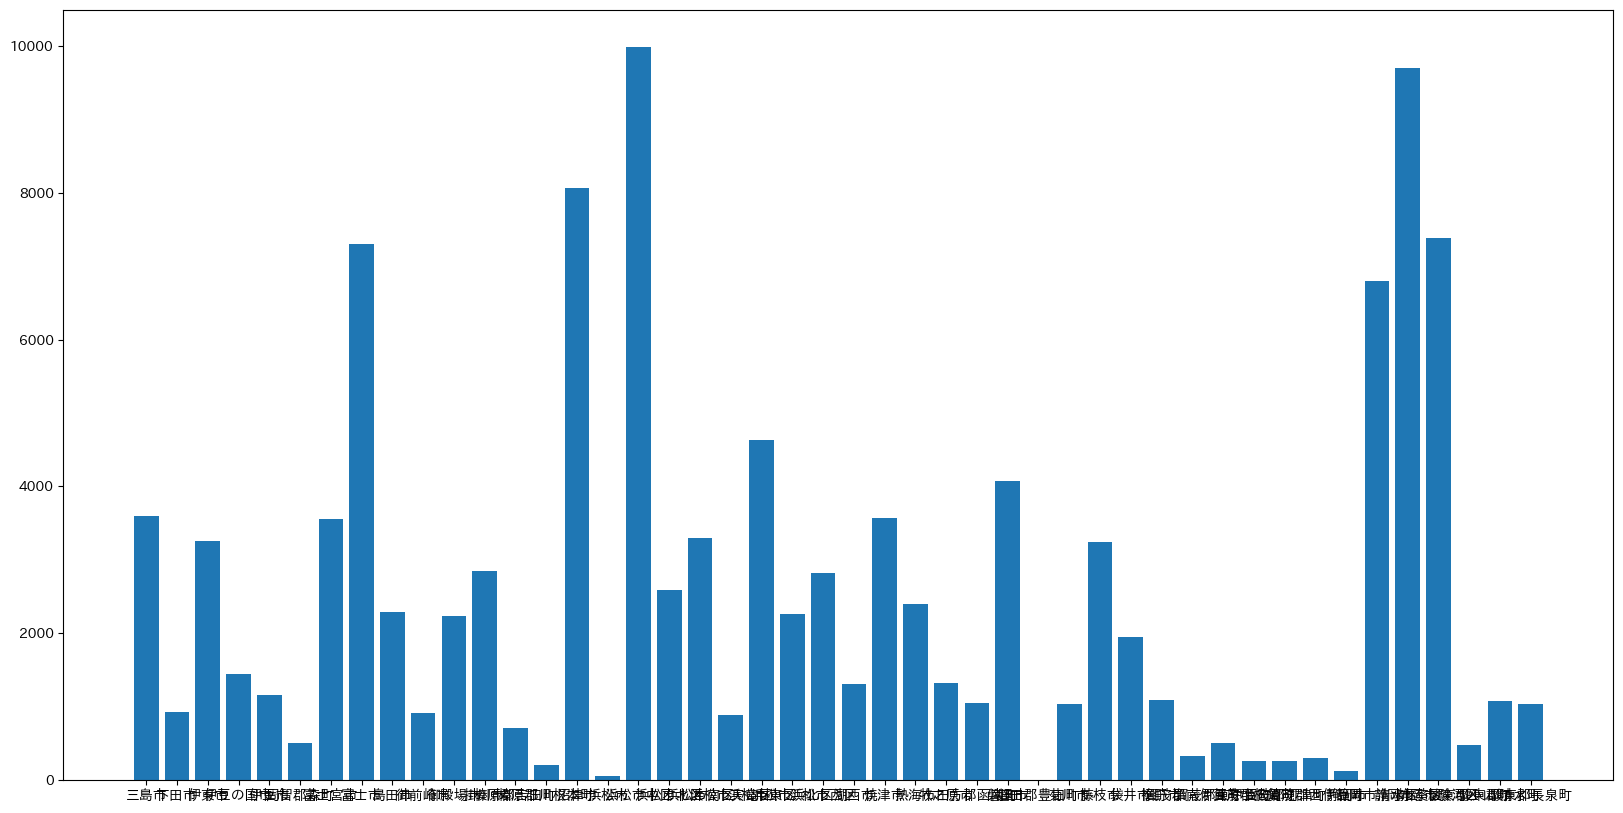

In [720]:
import matplotlib.pyplot as plt
import japanize_matplotlib

x = tmp.index
y = tmp.values

plt.figure(figsize=(20, 10))

plt.bar(x, y)

#### ノック15 : グラフの縦横と表示順を変えてみよう

In [721]:
tmp.sort_values(inplace=True, ascending=True)
tmp

cityName
磐田郡豊田町        3
浜松市          47
静岡市         121
榛原郡川根本町     200
賀茂郡松崎町      253
賀茂郡河津町      264
賀茂郡西伊豆町     295
賀茂郡南伊豆町     322
駿東郡小山町      470
周智郡森町       498
賀茂郡東伊豆町     498
榛原郡吉田町      708
浜松市天竜区      887
御前崎市        914
下田市         931
菊川市        1030
駿東郡長泉町     1041
田方郡函南町     1049
駿東郡清水町     1074
裾野市        1094
伊豆市        1163
湖西市        1311
牧之原市       1323
伊豆の国市      1444
袋井市        1942
御殿場市       2228
浜松市浜北区     2266
島田市        2292
熱海市        2394
浜松市北区      2586
浜松市西区      2815
掛川市        2849
藤枝市        3237
伊東市        3257
浜松市南区      3298
富士宮市       3555
焼津市        3568
三島市        3596
磐田市        4078
浜松市東区      4626
静岡市清水区     6796
富士市        7300
静岡市駿河区     7384
沼津市        8060
静岡市葵区      9697
浜松市中区      9994
dtype: int64

#### 横向きの棒グラフ

<BarContainer object of 46 artists>

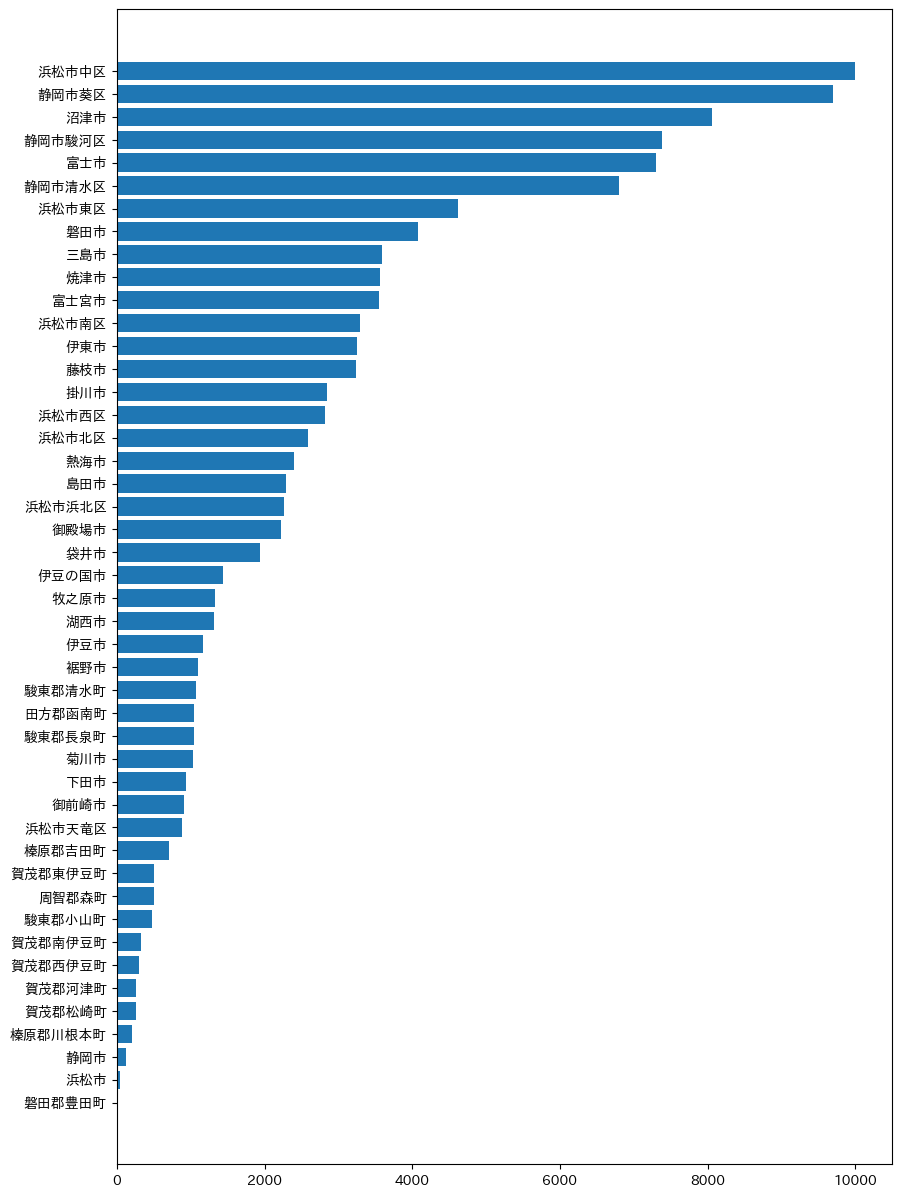

In [722]:
plt.figure(figsize=(10, 15))

x = tmp.index
y = tmp.values

plt.barh(x, y)

### ノック16 : グラフのタイトルとラベルを設定しよう

#### 上位10件のグラフ

Text(0, 0.5, '法人数')

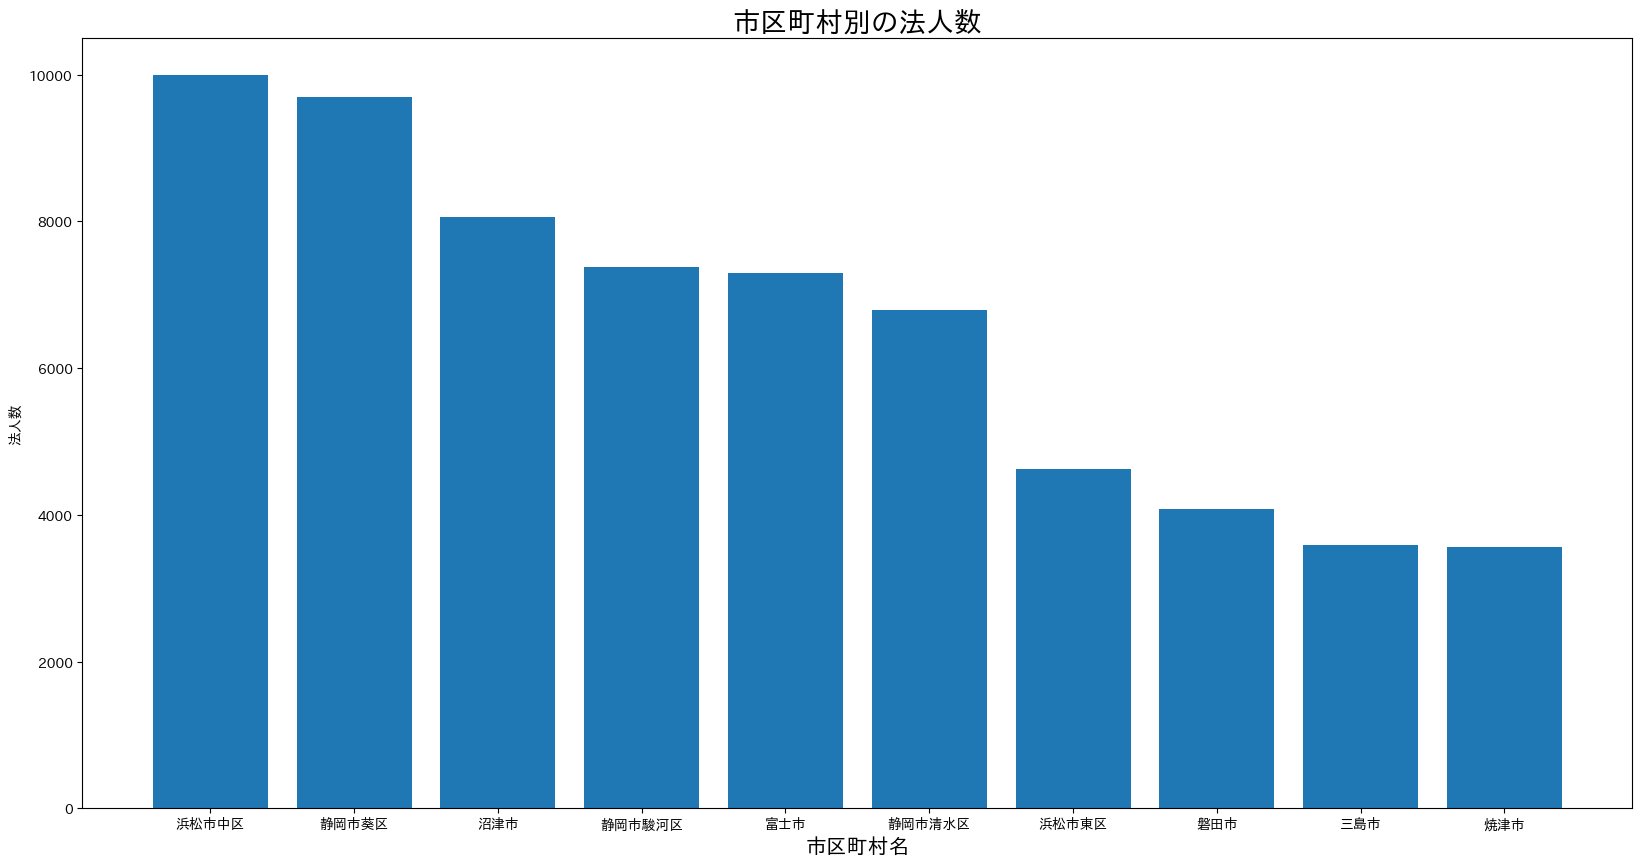

In [723]:
tmp.sort_values(inplace=True, ascending=False)

plt.figure(figsize=(20, 10))

x = tmp.index[:10]
y = tmp.values[:10]

plt.bar(x, y)

plt.title('市区町村別の法人数', fontsize=20)
plt.xlabel('市区町村名', fontsize=15)
plt.ylabel('法人数')

### ノック17 : グラフの見た目をもっと変えてみよう

#### 見た目を加工した棒グラフ

Text(7.5, 9000, '上位10の自治体を抜粋して表示')

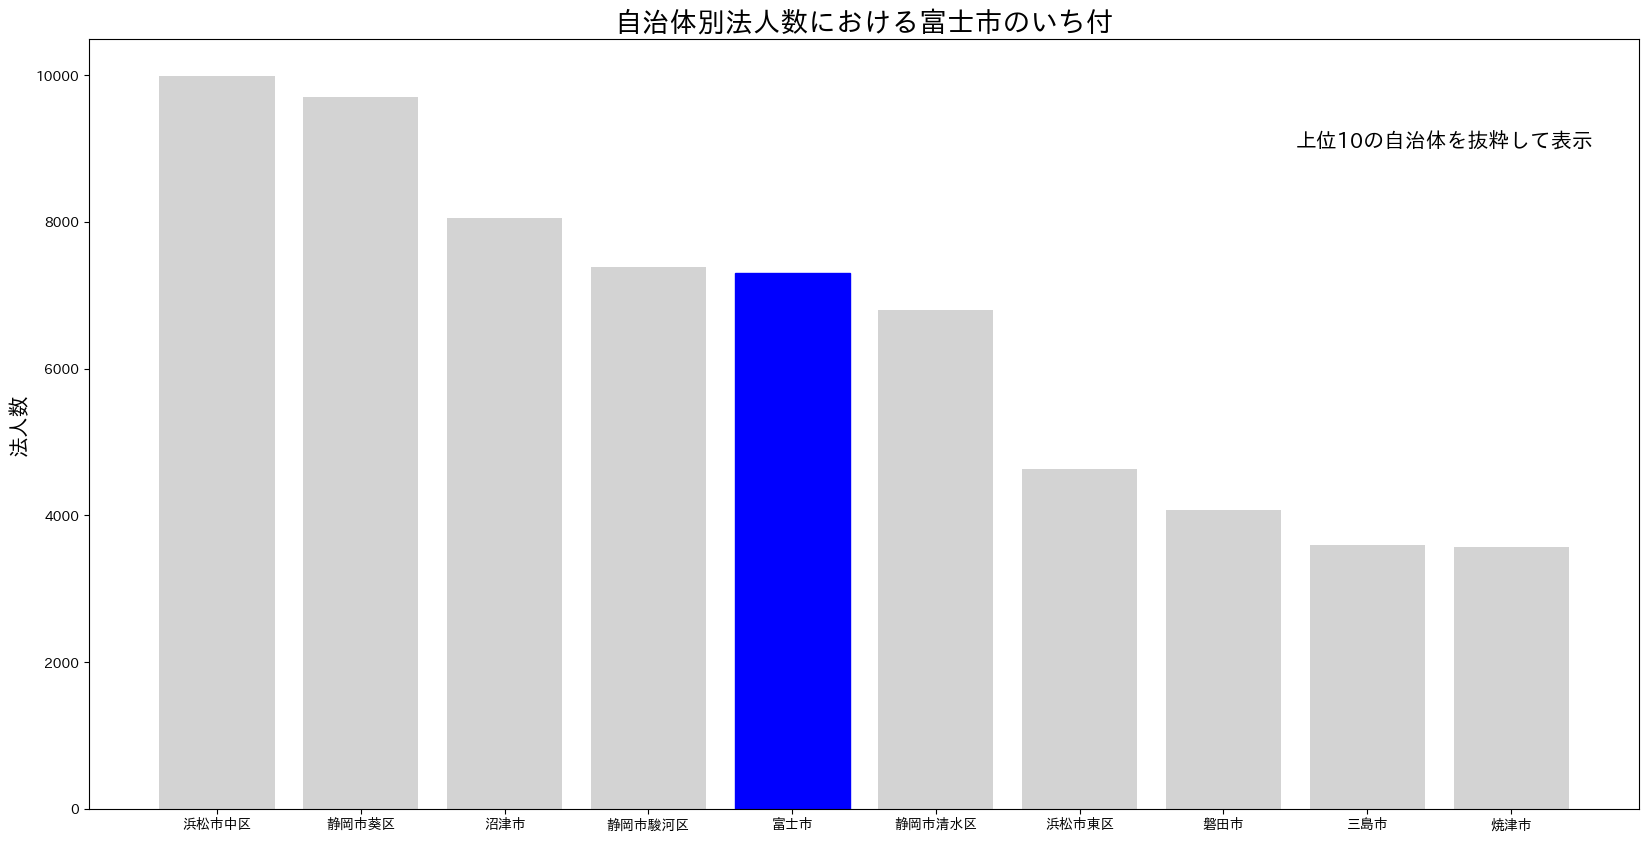

In [724]:
tmp.sort_values(inplace=True, ascending=False)
tmp = tmp[:10]

x = tmp.index[:10]
y = tmp.values[:10]

fig, ax = plt.subplots(figsize=(20, 10))

bar_list = ax.bar(x, y, color='lightgray')
bar_list[4].set_color('blue')

ax.set_title('自治体別法人数における富士市のいち付', fontsize=20)
ax.set_ylabel('法人数', fontsize=15)
ax.text(7.5, 9000, '上位10の自治体を抜粋して表示', fontsize=15)

### ノック18 : 90日以内に新規登録された法人数を可視化しよう

#### 現在の日時

In [725]:
base_time = pd.Timestamp.now(tz='Asia/Tokyo')
base_time

Timestamp('2024-03-07 20:26:45.362088+0900', tz='Asia/Tokyo')

#### 処理を行うデータ

In [726]:
shizuoka_data.head()

,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04


In [727]:
shizuoka_data['assignmentDate'] = shizuoka_data['assignmentDate'].dt.tz_localize('Asia/Tokyo')
shizuoka_data.head()

,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04


#### 10000日以内に新規登録された法人を抽出する

In [728]:
delta = pd.Timedelta(10000, 'days')

tmp = shizuoka_data.loc[(shizuoka_data['process_kbn_name'] == '新規') & (base_time - shizuoka_data['assignmentDate'] <= delta)]
tmp.head()

,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04


#### ノック19 : 年度別の推移を可視化しよう

#### 市区町村が区で終わるデータ

In [733]:
tmp = shizuoka_data.dropna(subset=['cityName'])
tmp = tmp.loc[tmp['cityName'].str.match('^.*区$')]
tmp.head()

,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
15,浜松市中区,1000030220005,赤佐財産区,地方公共団体,新規,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09
29,浜松市中区,1010001050158,中貿開発株式会社,株式会社,新規,2015-10-05 00:00:00+09:00,2018-08-02,2018,2018-08


#### 対象年月で絞り込んだデータ

In [734]:
tmp = tmp.loc[(tmp['update_fiscal_year'] >= 2016) & (tmp['update_fiscal_year'] < 2021)]
tmp.head()

,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
15,浜松市中区,1000030220005,赤佐財産区,地方公共団体,新規,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09
29,浜松市中区,1010001050158,中貿開発株式会社,株式会社,新規,2015-10-05 00:00:00+09:00,2018-08-02,2018,2018-08


#### グループ化後のデータ

In [735]:
tmp = tmp.groupby(['cityName', 'update_fiscal_year']).size()
tmp.name = 'count'
tmp = tmp.reset_index()

tmp.head(6)

,cityName,update_fiscal_year,count
0,浜松市中区,2016,742
1,浜松市中区,2017,365
2,浜松市中区,2018,1887
3,浜松市中区,2019,1302
4,浜松市中区,2020,1134
5,浜松市北区,2016,96


#### 年度別推移の折れ線グラフ

AttributeError: 'Axes' object has no attribute 'xasix'

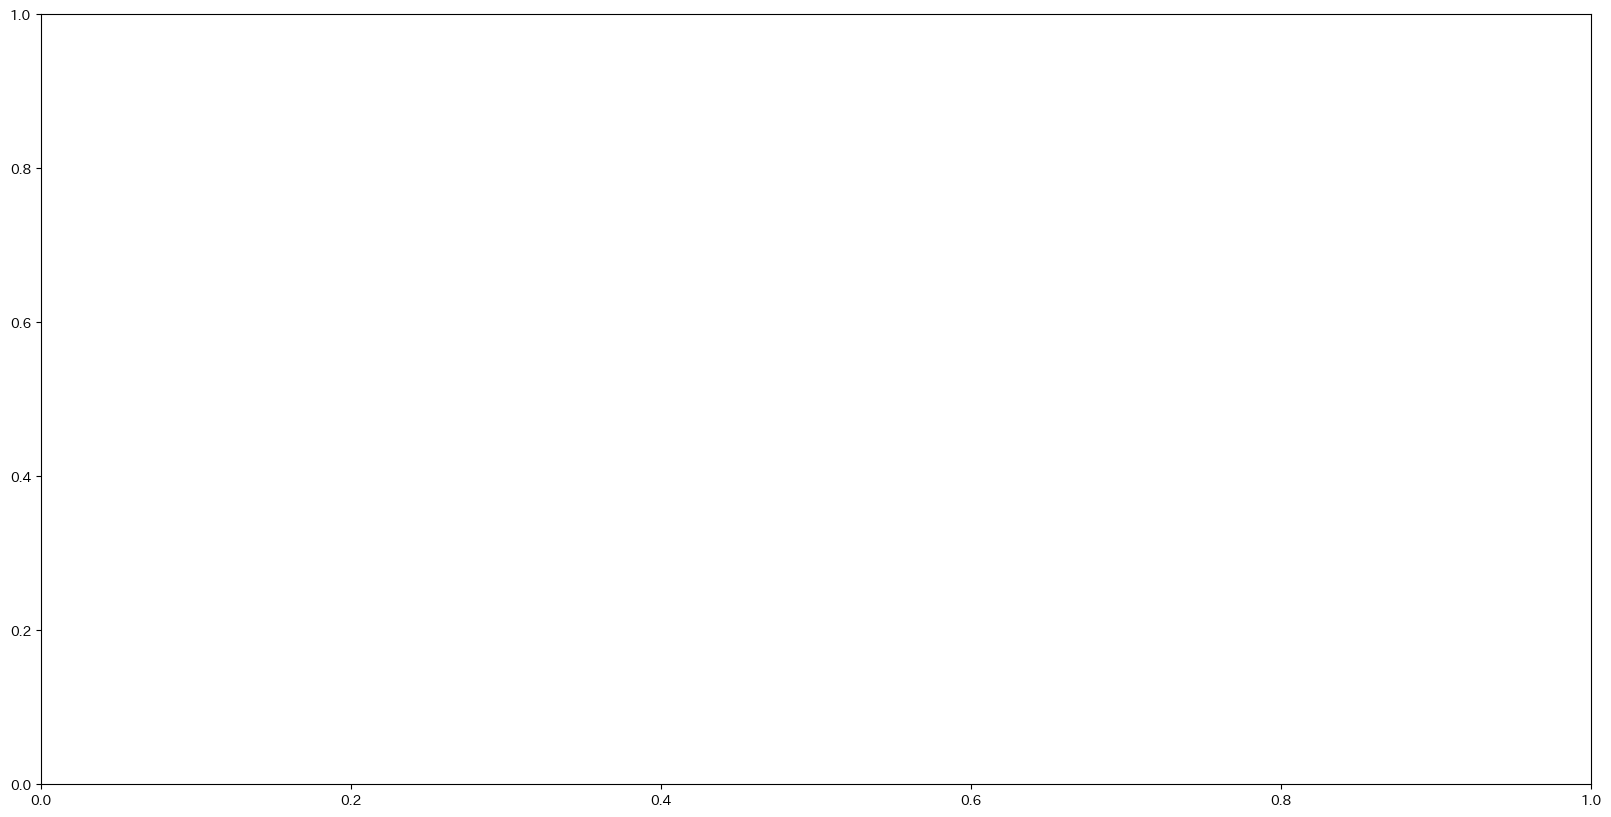

In [739]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(20, 10))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

img = sns.lineplot(x=tmp['update_fiscal_year'], y=tmp['count'], hue=tmp['cityName'])